In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from keras.datasets import mnist # مثل دیجیت ولی جای 8.8 الان 28.28

In [2]:
data = mnist.load_data()

In [3]:
(x_train, y_train), (x_test, y_test) = data

In [4]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

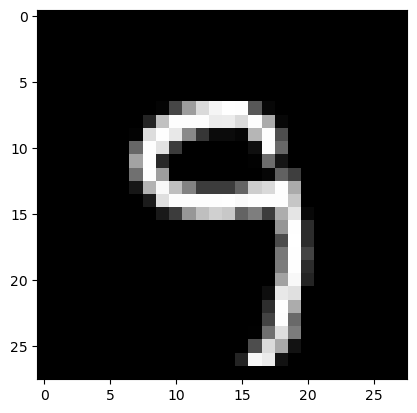

In [5]:
plt.imshow(x_train[14116], cmap='gray')

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
y_train_oh[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [8]:
x_train_vec = x_train.reshape(60000, -1)/255
x_test_vec = x_test.reshape(10000, -1) /255

In [9]:
print(x_train_vec.max(), x_train_vec.min())

1.0 0.0


- در شبکه عصبی دیتارو بیاریم روی 0 و1 که شبکه سبک تر بشه
- تصویر معمولا نرمال نیست

In [10]:
len(np.unique(y_train)),x_train_vec.shape[1]

(10, 784)

In [11]:
model = Sequential()

model.add(Input(shape = (x_train_vec.shape[1],)))

model.add(Dense(x_train_vec.shape[1],activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(len(np.unique(y_train)),activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818,970 (3.12 MB)

 Trainable params: 818,970 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

![alt text](image-10.png)

- CSVLogger -> بعد هر تپوک نتایج رو سیو کنه 
- LambdaCallback -> تابع میدی تابع مارو صدا میزنه

In [13]:
from keras.callbacks import EarlyStopping

# monitor: str = "val_loss",
# min_delta: تا وقتی تعیرات دیگه صفر باشه
# patience: میگه صبر کن ببین به ازای ان تا اپوک صبر کن تا دلتا رو تست کنی 
# verbose: چاپ بکنه چیزی
# mode: str = "auto", تشخصیص خودکار بالارونده یا پایین رونده بودن  مثلا لاس باید بریم مینیموم
# baseline: حداقلی که باید از فلان بالاتر بره. حداقل انقدر کیفیت رو میخام
# restore_best_weights: bool = False, اگه ترو باشه میاد بهترین وزن هارو میزاره تو خروجی مثلا اگه ما 10 تا رفتیم بهترین وزن 8 بوده اونو میزاره
# start_from_epoch: int = از کدوم اپوک شروع کنه

In [14]:
es = EarlyStopping(min_delta=0.01,patience=2,verbose=True)

res = model.fit(x_train_vec,y_train_oh,epochs=10,validation_data=(x_test_vec,y_test_oh),callbacks=[es])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9104 - loss: 0.2955 - val_accuracy: 0.9715 - val_loss: 0.0937
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9754 - loss: 0.0781 - val_accuracy: 0.9734 - val_loss: 0.0846
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9830 - loss: 0.0524 - val_accuracy: 0.9737 - val_loss: 0.0860
Epoch 3: early stopping


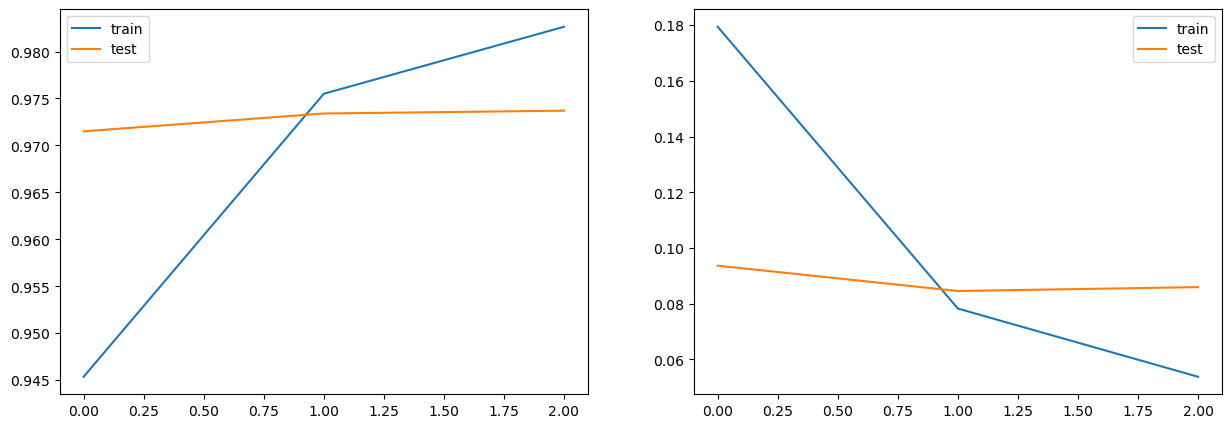

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.legend(['train','test'])
plt.subplot(1,2,2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['train','test']);

In [16]:
model.save('1_3_model.h5')